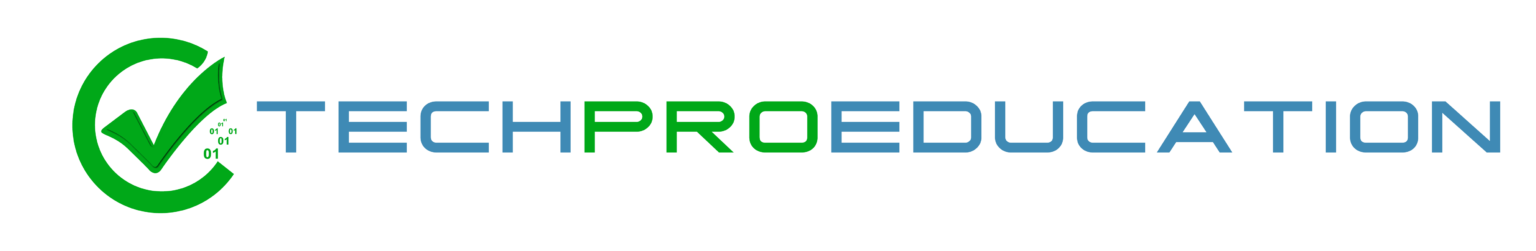

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

**Age:** Describes the age of individuals. Continuous.

**Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** Continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** Number of years spent in education. Continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital-gain:** Continuous.

**capital-loss:** Continuous.

**hours-per-week:** Continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary:** >50K,<=50K

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df = pd.read_csv("adult.csv")

# Exploratory Data Analysis and Visualization

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
adult = df.copy()

In [11]:
adult.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [12]:
df.shape

(32561, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [16]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [17]:
df_numeric.nunique()

age                  73
fnlwgt            21648
education.num        16
capital.gain        119
capital.loss         92
hours.per.week       94
dtype: int64

In [18]:
df_numeric_list = df.select_dtypes(include="number").columns.tolist()
df_numeric_list

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [19]:
df_numeric

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [20]:
(df_numeric.columns == "?").sum()

0

In [21]:
df_categoric_list = df.select_dtypes(include="object").columns.tolist()
df_categoric_list

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [22]:
df_categoric = df.select_dtypes(include="object")
df_categoric

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [23]:
df_categoric.nunique()

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country    42
income             2
dtype: int64

In [24]:
df_categoric.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [25]:
(df_categoric["workclass"] == "?").sum()

1836

In [26]:
(df_categoric["education"] == "?").sum()

0

In [27]:
(df_categoric["marital.status"] == "?").sum()

0

In [28]:
(df_categoric["occupation"] == "?").sum()

1843

In [29]:
(df_categoric["relationship"] == "?").sum()

0

In [30]:
(df_categoric["race"] == "?").sum()

0

In [31]:
(df_categoric["sex"] == "?").sum()

0

In [32]:
(df_categoric["native.country"] == "?").sum()

583

In [33]:
(df_categoric["income"] == "?").sum()

0

In [34]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [35]:
unique_values(df, df_categoric)

Column: workclass
------------------------------
Unique Values (9): ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Value Counts:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Column: education
------------------------------
Unique Values (16): ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Value Counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433

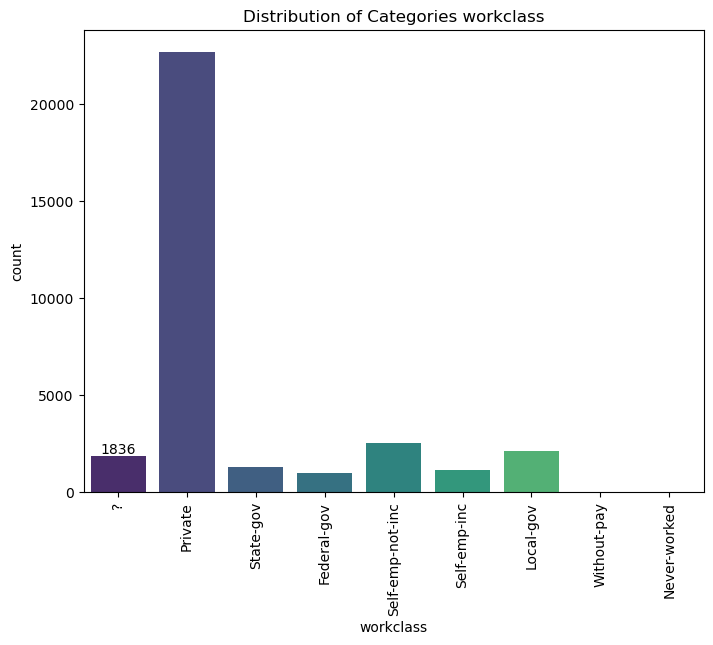

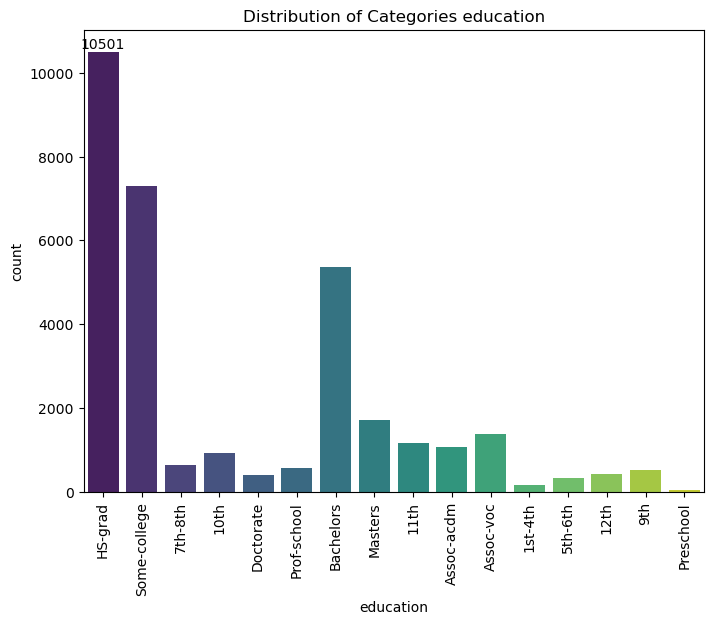

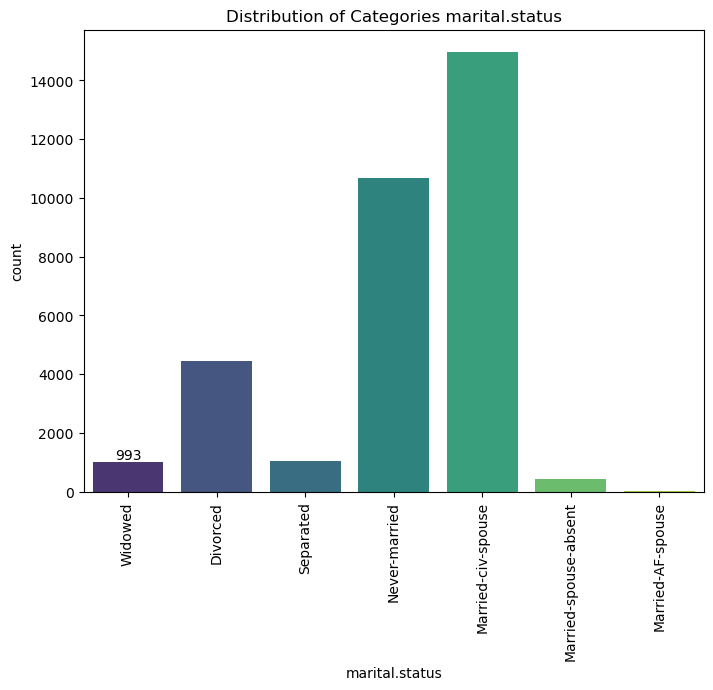

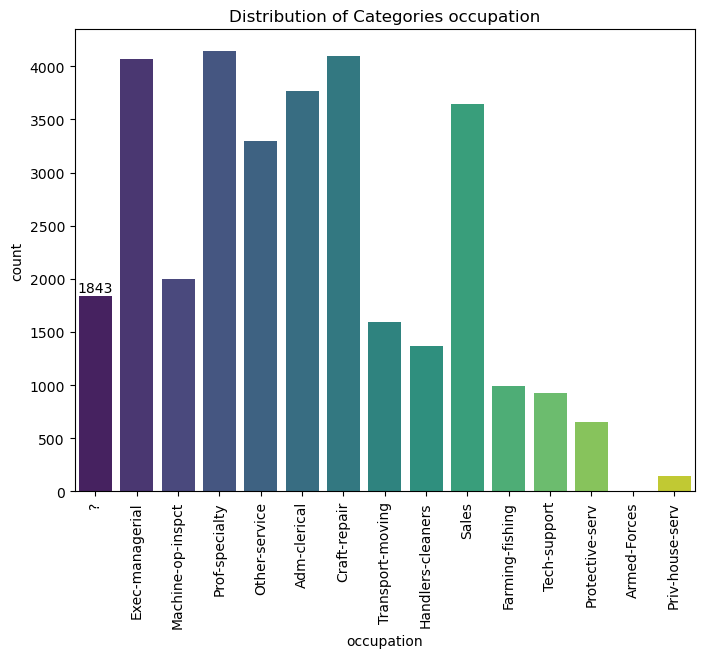

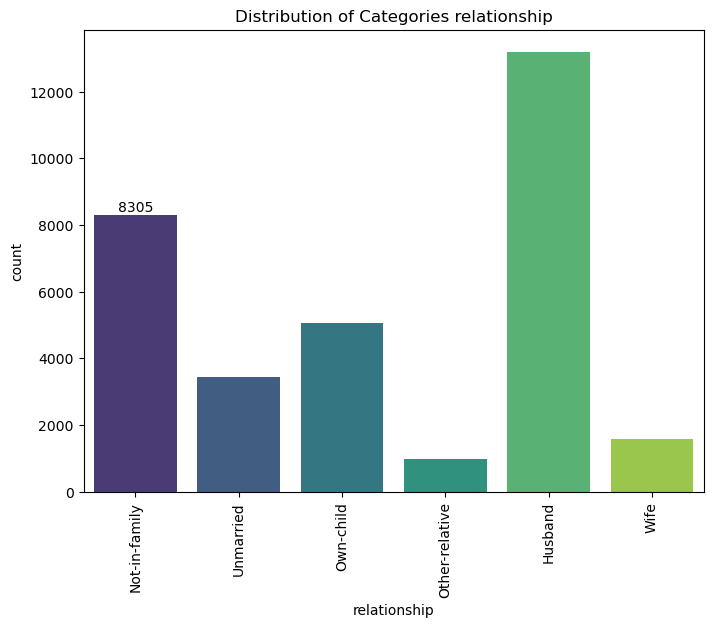

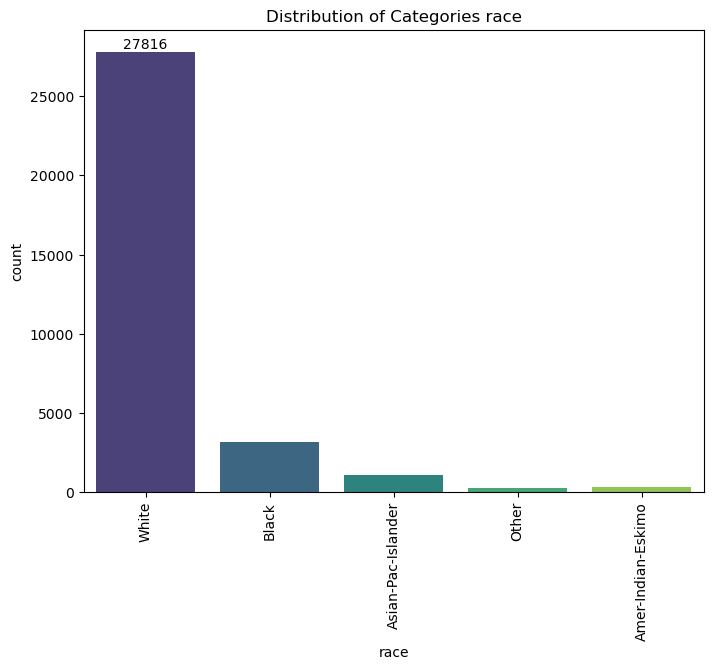

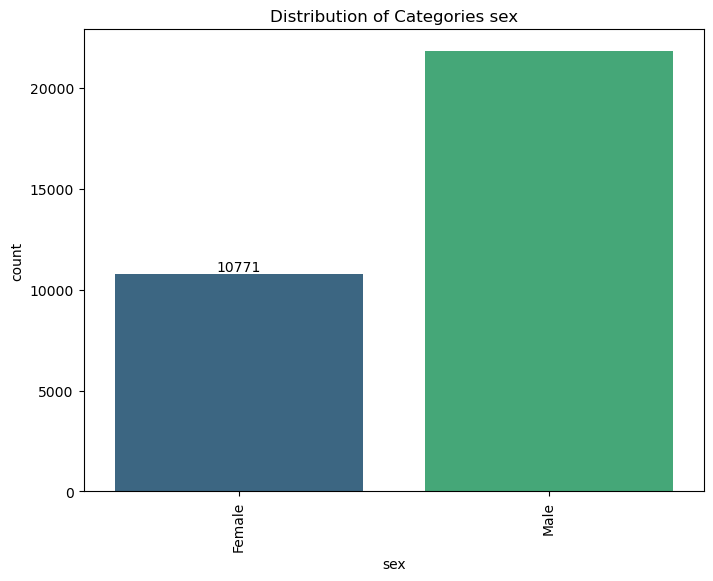

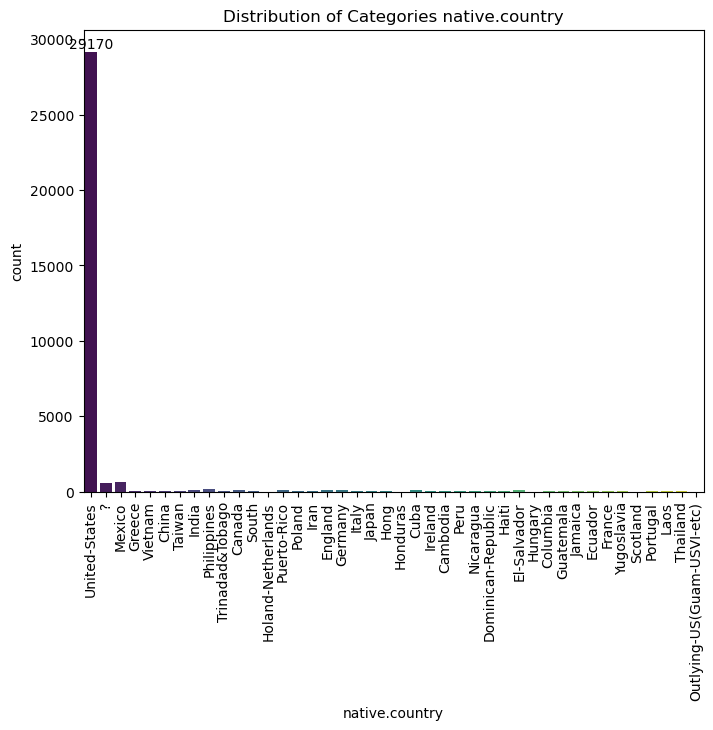

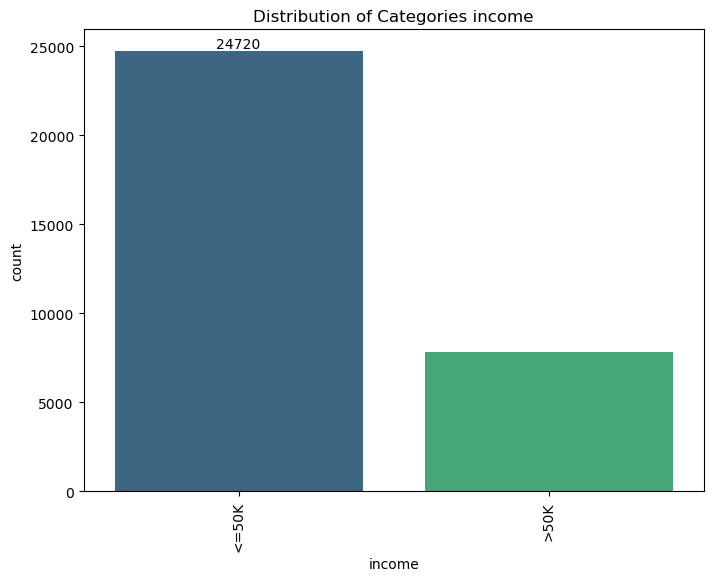

In [36]:
# Kategorik feature ların dağılımını göstermek için;

for column in df_categoric:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])
    
    plt.xticks(rotation=90)
    plt.show()

In [37]:
df.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [38]:
df.income.value_counts(normalize=True)

income
<=50K   0.759
>50K    0.241
Name: proportion, dtype: float64

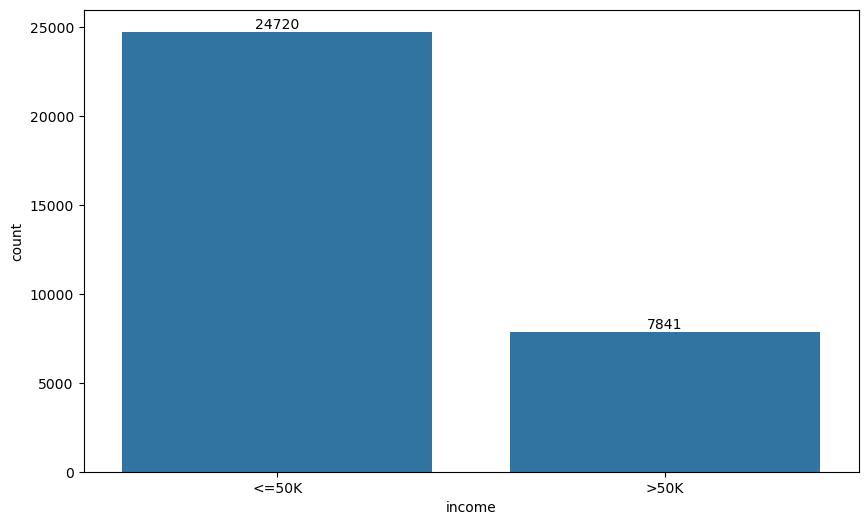

In [39]:
ax = sns.countplot(x="income", data = df)
ax.bar_label(ax.containers[0]);

# Datamda bir inbalanced durumu söz konusu ancak dataya bir inbalanced muamelesinde bulunup bulunmayacağımıza scorları gördükten
# sonra karar vereceğiz.

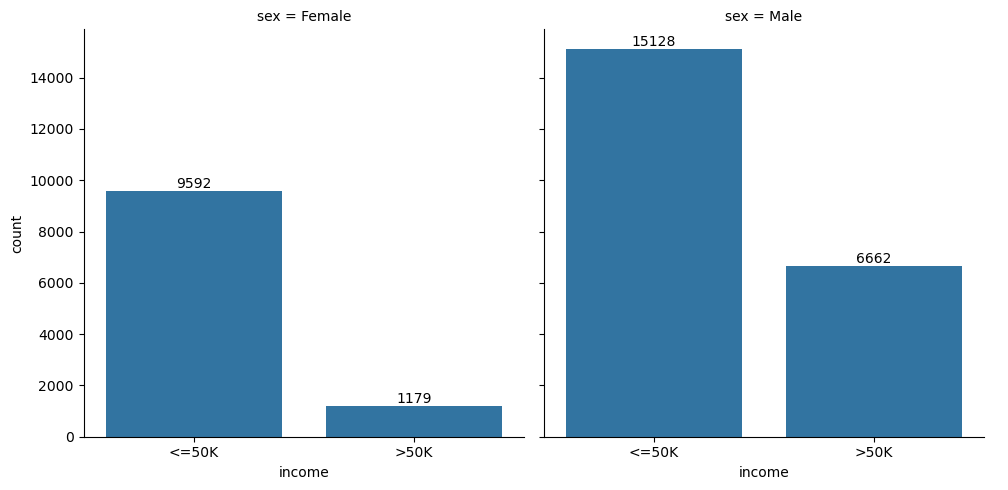

In [40]:
g = sns.catplot(x="income", data=df, kind="count", col="sex")

g.facet_axis(0,0).bar_label(container=g.facet_axis(0,0).containers[0])
g.facet_axis(0,1).bar_label(container=g.facet_axis(0,1).containers[0]);

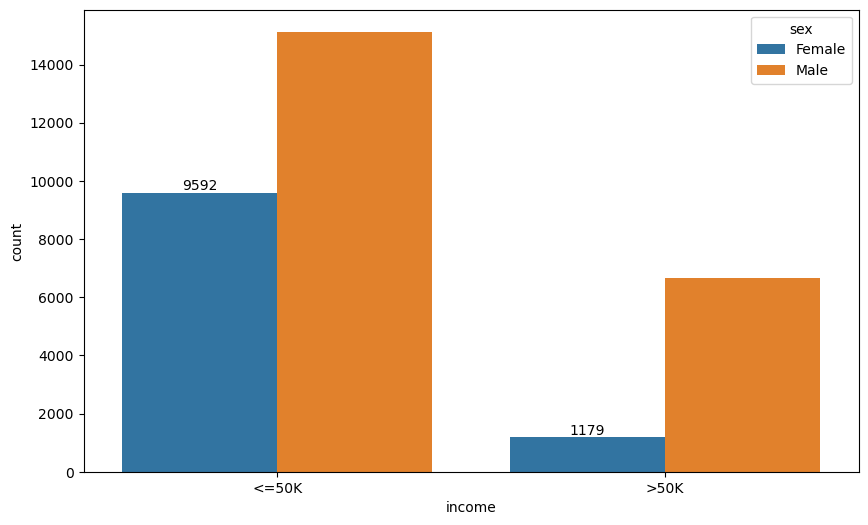

In [41]:
ax = sns.countplot(x="income", hue="sex", data = df)
ax.bar_label(ax.containers[0]);

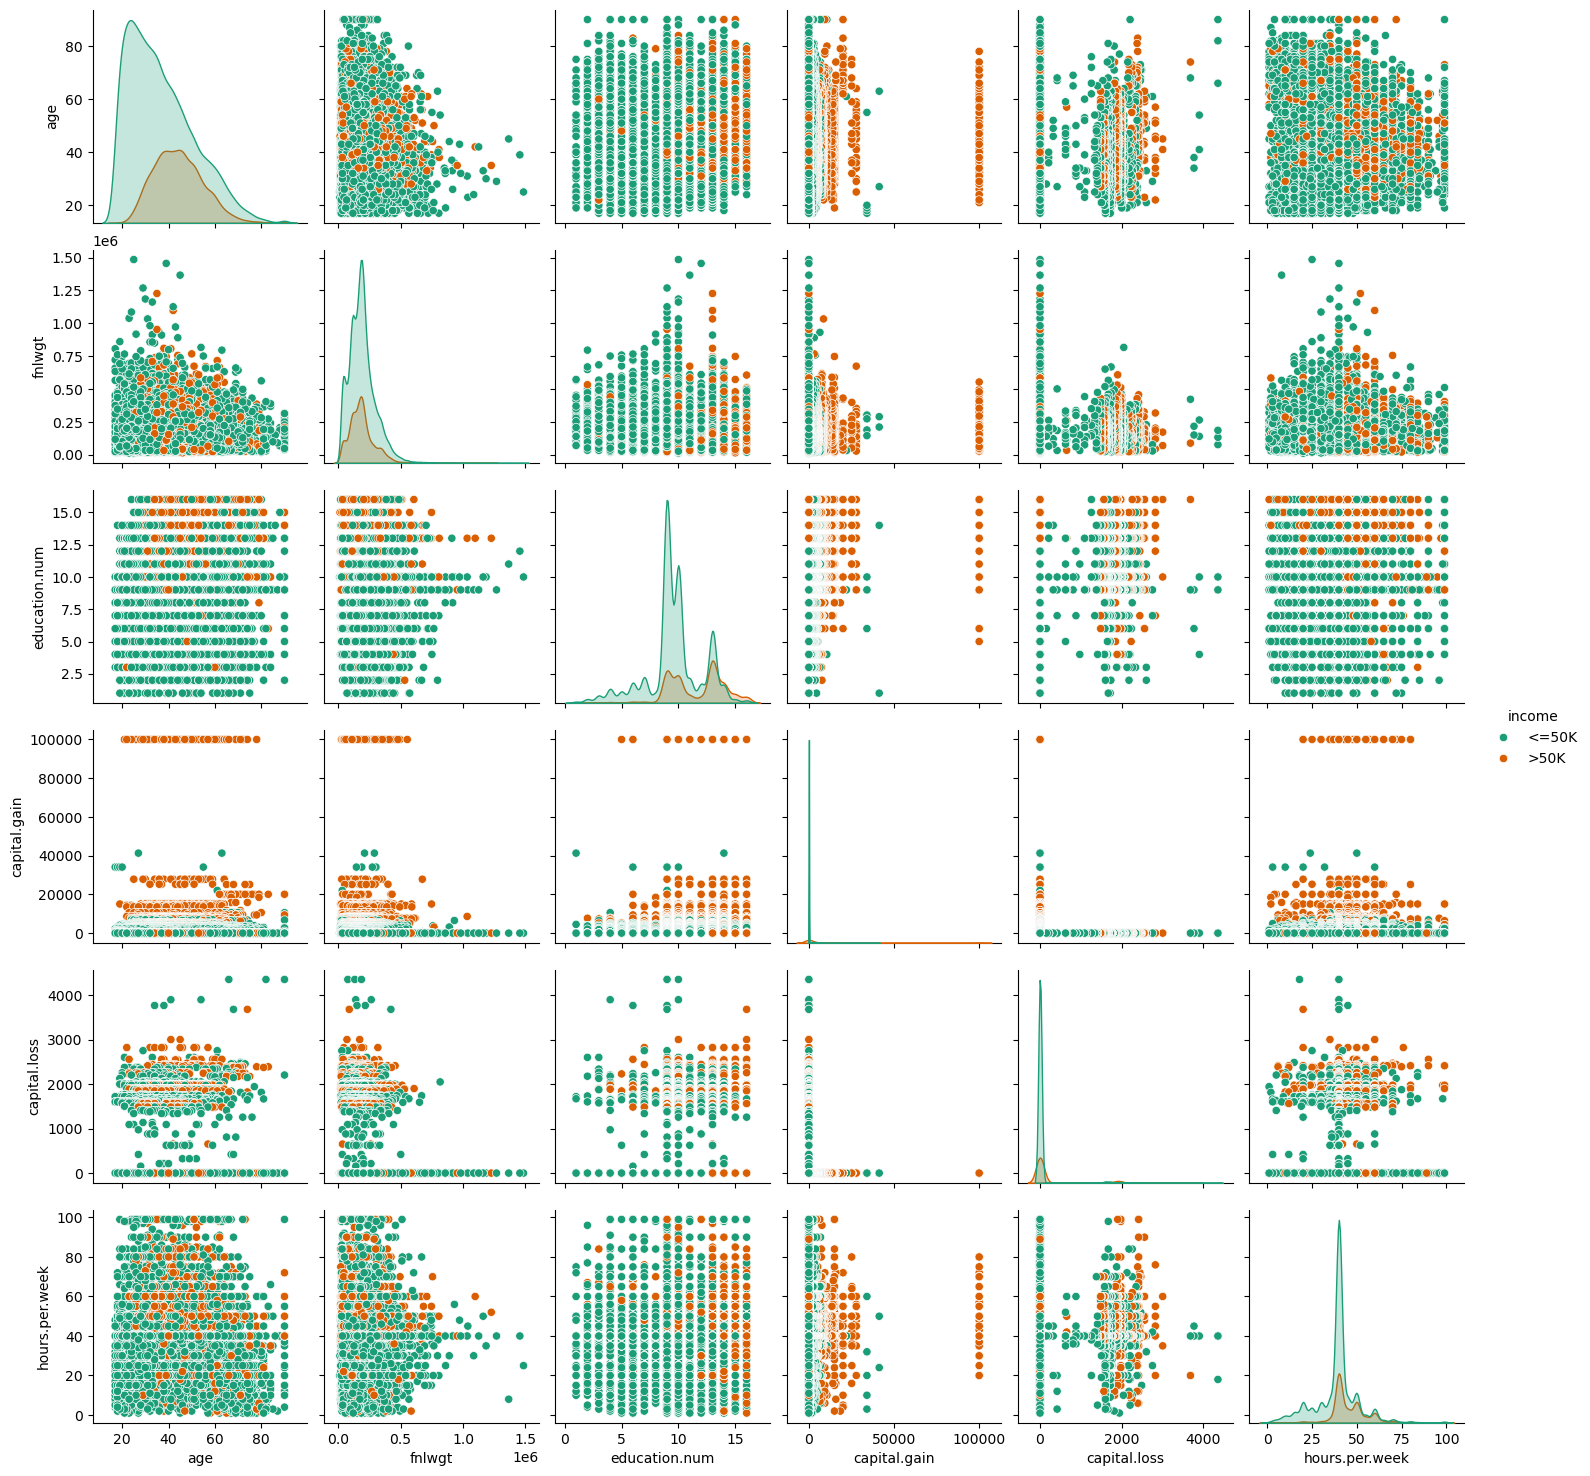

In [42]:
sns.pairplot(df, hue = "income", palette = "Dark2");

# Burda herbir featuran ne kadar ayırt edici özellikte olduğunu görmekle birlikte labelların hangi featurlar özelinde
# nasıl ayrıştıklarını da görebiliyoruz.

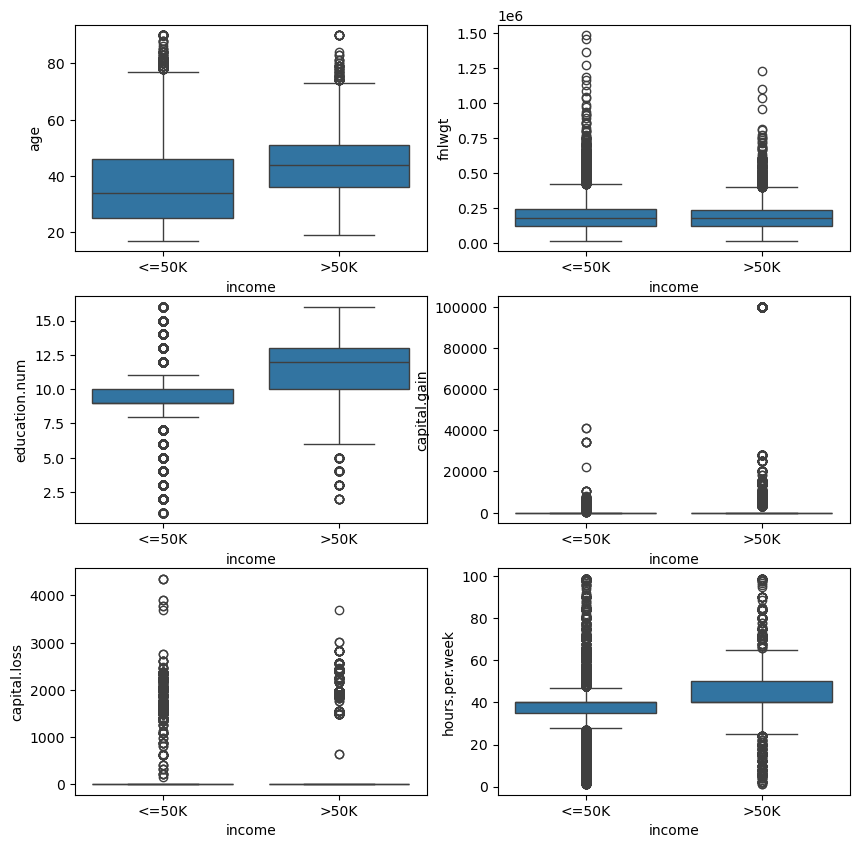

In [43]:
index = 0
plt.figure(figsize=(10,10))
for feature in df.select_dtypes("number"):
    if feature != "income":
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x='income',y=feature,data=df)
        
# pair plotdan aldığımız insight ları burdan da alabiliyoruz.

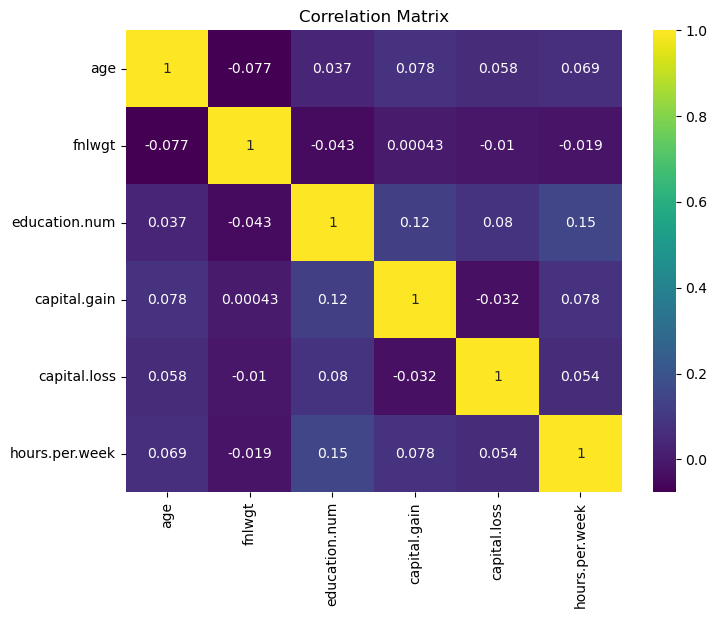

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [45]:
# Assuming df is your DataFrame with the two columns of interest
column1 = "workclass"  # Replace "column_name_1" with the name of your first column
column2 = "occupation"  # Replace "column_name_2" with the name of your second column

# Check if "?" occurs in the same rows in both columns
same_row_count = ((df_categoric[column1] == "?") & (df_categoric[column2] == "?")).sum()

# Print the count of rows where "?" occurs in the same rows in both columns
print("Number of rows where '?' occurs in both columns simultaneously:", same_row_count)


Number of rows where '?' occurs in both columns simultaneously: 1836


In [46]:
# Assuming df is your DataFrame with the two columns of interest
column1 = "workclass"  # Replace "column_name_1" with the name of your first column
column2 = "occupation"  # Replace "column_name_2" with the name of your second column
column3 = "native.country"
# Filter the DataFrame to include only rows where "?" occurs in both columns
df_both_columns = df_categoric[(df_categoric[column1] == "?") & (df_categoric[column2] == "?")&(df_categoric[column3]=="?")]

# Assuming df is your DataFrame with the two columns of interest
column1 = "workclass"  # Replace "column_name_1" with the name of your first column
column2 = "occupation"  # Replace "column_name_2" with the name of your second column
column3 = "native.country"

# Check if "?" occurs in the same rows in both columns
same_row_count = ((df_categoric[column1] == "?") & (df_categoric[column2] == "?")&(df_categoric[column3]=="?")).sum()

# Print the count of rows where "?" occurs in the same rows in both columns
print("Number of rows where '?' occurs in both columns simultaneously:", same_row_count)


print("   ")

# Print the DataFrame with both columns together

print(df_both_columns[[column1, column2, column3]])


Number of rows where '?' occurs in both columns simultaneously: 27
   
      workclass occupation native.country
1181          ?          ?              ?
1204          ?          ?              ?
2591          ?          ?              ?
3415          ?          ?              ?
3508          ?          ?              ?
4284          ?          ?              ?
5229          ?          ?              ?
5674          ?          ?              ?
6932          ?          ?              ?
7324          ?          ?              ?
7545          ?          ?              ?
9493          ?          ?              ?
11071         ?          ?              ?
12596         ?          ?              ?
14329         ?          ?              ?
15522         ?          ?              ?
18591         ?          ?              ?
18898         ?          ?              ?
20440         ?          ?              ?
21931         ?          ?              ?
22056         ?          ?              ?
25073

In [47]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [51]:
df.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [52]:
df.occupation.value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [53]:
df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [54]:
((df["native.country"] == "?")).sum()

0

In [55]:
((df["occupation"] == "?")).sum()

0

In [56]:
((df["workclass"] == "?")).sum()

0

In [57]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [58]:
df["income"] = df['income'].map({'>50K': 1, '<=50K': 0})

In [59]:
df.sample(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
685,49,Self-emp-inc,213140,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,60,United-States,1
12289,50,Local-gov,30682,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
32478,28,Private,185647,Some-college,10,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
21012,26,Private,335998,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,38,United-States,0
2146,35,Private,127306,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Female,14344,0,40,United-States,1
9927,31,Local-gov,357954,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,Male,0,0,20,United-States,0
13711,23,Private,141264,Some-college,10,Never-married,Exec-managerial,Other-relative,Black,Female,0,0,40,United-States,0


In [60]:
df.shape

(30162, 15)

In [61]:
df_categoric = df.select_dtypes(include="object")

In [62]:
df_categoric.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [63]:
df_categoric.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [64]:
df_categoric.workclass.value_counts()

workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

In [65]:
df_categoric.occupation.value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [66]:
df_categoric["native.country"].value_counts()

native.country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      

In [67]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education.num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital.gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital.loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours.per.week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [68]:
(df_numeric["capital.loss"] == 0).sum()

31042

In [69]:
(df_numeric["capital.gain"] == 0).sum()

29849

In [70]:
df["education.num"].nunique()

16

In [71]:
df["education"].nunique()

16

In [72]:
df.drop("education", axis=1, inplace=True)

In [73]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [74]:
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [75]:
df["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [76]:
df_categoric = df.select_dtypes(include="object")

In [77]:
df["education.num"]

1         9
3         4
4        10
5         9
6         6
         ..
32556    10
32557    12
32558     9
32559     9
32560     9
Name: education.num, Length: 30162, dtype: int64

In [78]:
df["education.num"].value_counts()

education.num
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: count, dtype: int64

In [79]:
df_categoric

,workclass,marital.status,occupation,relationship,race,sex,native.country
1,Private,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
3,Private,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Separated,Prof-specialty,Own-child,White,Female,United-States
5,Private,Divorced,Other-service,Unmarried,White,Female,United-States
6,Private,Separated,Adm-clerical,Unmarried,White,Male,United-States
...,...,...,...,...,...,...,...
32556,Private,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States


# Train | Test Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df.drop('income', axis=1)
y = df["income"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [83]:
X_train.shape

(27145, 13)

In [84]:
X_test.shape

(3017, 13)

# Modeling with Pipeline and Column Transfer

## Logistic Regression

In [85]:
X_train.sample(3)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
9988,49,Private,123584,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,75,United-States
14940,17,Private,127366,7,Never-married,Sales,Own-child,White,Female,0,0,8,United-States
20564,48,Federal-gov,435503,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [86]:
X_test.sample(3)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
8241,29,Private,250679,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
17821,32,Private,125856,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States
15362,47,Private,110243,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States


In [87]:
cat = X_train.select_dtypes("object").columns
cat

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [95]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())


Evet, bu parametrelerin her birini açıklayayım:

1. **categories**: Bu parametre, kategorik sütunlardaki benzersiz kategori sayısını otomatik olarak belirlemek için kullanılır. 'auto' olarak ayarlandığında, kategorik sütunlardaki benzersiz kategoriler otomatik olarak belirlenir. Varsayılan olarak, 'auto' ayarlıdır.

2. **drop**: Bu parametre, kategorik sütunların kodlanmasından sonra orijinal sütunun kaldırılıp kaldırılmayacağını belirler. Varsayılan olarak, bu parametre `None` olarak ayarlıdır, yani orijinal sütunlar kodlanmış sütunlarla birlikte kalır.

3. **sparse**: Bu parametre artık kullanılmıyor (`deprecated`). Önceden, kodlanmış verinin seyrek formda olup olmayacağını belirlemek için kullanılıyordu. Ancak, bu parametre artık önerilmiyor.

4. **sparse_output**: Bu parametre, kodlanmış verinin seyrek matris formunda olup olmayacağını belirler. `True` olarak ayarlandığında, kodlanmış veri seyrek matris olarak döndürülür. Bu, bellek kullanımını minimize etmeye yardımcı olabilir. Varsayılan olarak `False` olarak ayarlıdır.

5. **dtype**: Bu parametre, kodlanmış sütunların veri türünü belirler. Varsayılan olarak, `numpy.float64` olarak ayarlanmıştır.

6. **handle_unknown**: Bu parametre, kodlanırken bilinmeyen kategorik değerlerle karşılaşıldığında nasıl bir işlem yapılacağını belirler. 'error' olarak ayarlandığında, hata verilir. 'ignore' olarak ayarlandığında, bilinmeyen kategorik değerler yok sayılır.

7. **min_frequency**: Bu parametre, kategorik değerlerin en az kaç kez görünmesi gerektiğini belirler. Bu, nadir kategorik değerlerin kodlanmasını sınırlandırmak için kullanılabilir.

8. **max_categories**: Bu parametre, bir sütunda en fazla kaç farklı kategori olabileceğini belirler. Bu, çok fazla kategoriye sahip sütunların kodlanmasını sınırlamak için kullanılabilir.

9. **feature_name_combiner**: Bu parametre, birden fazla kodlanmış sütunu birleştirirken kullanılacak yöntemi belirler. 'concat' olarak ayarlandığında, sütun isimleri birleştirilir.

Bu parametreler, `pd.get_dummies()` fonksiyonunu kullanırken kodlanmış verinin nasıl oluşturulacağını ve işleneceğini ayarlamak için kullanılır.

In [96]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,1.000,0.000,0.000,-0.717,-0.781,1.918,-0.148,-0.218,2.430
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.489,-0.315,-0.438,-0.148,-0.218,-0.077
2,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.880,-0.057,-0.438,-0.148,-0.218,-0.077
3,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.033,-0.335,-0.438,-0.148,4.865,-0.077
4,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,1.000,0.000,0.000,-0.413,0.143,-0.438,-0.148,-0.218,-0.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27140,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.261,0.046,-0.438,-0.148,-0.218,-0.244
27141,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,-1.478,1.532,-0.046,-0.148,-0.218,-0.077
27142,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.261,0.639,-0.438,-0.148,-0.218,0.257
27143,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.717,-0.121,1.918,-0.148,-0.218,0.759


In [98]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=101))]

pipe_log = Pipeline(steps=operations)


In [91]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object'))])),
                ('log_model', LogisticRegression(random_state=101))])

In [92]:
y_pred = pipe_log.predict(X_test)
y_pred_proba = pipe_log.predict_proba(X_test)

In [93]:
my_dict = {"actual": y_test}

In [94]:
result_log = pd.DataFrame(my_dict)
result_log

,actual
7210,1
20671,1
3615,0
30695,0
14728,0
...,...
10307,0
17653,1
26798,0
29170,0


In [ ]:
result_log["pred"] = y_pred
result_log

### LOG Model Performance


In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_log, X_test, y_test);

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_log)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

### CV and GridSearch - LogReg

In [ ]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [7]:
df_scores.mean()[2:]  

NameError: name 'df_scores' is not defined

In [ ]:
# pipeline for logistic regression

operations = [("column_trans", column_trans), ("log_model", LogisticRegression(max_iter=5000, random_state=101))]

model = Pipeline(steps=operations)

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

# -1 ile 5 arasında 20 tane C değeri elde etmek için
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, regülarizasyonun optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 10)

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight = ["balanced", None]
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["lbfgs", "liblinear", "sag", "saga"]

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C,1],  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}

scorer = make_scorer(f1_score, average='macro')

# en iyi modeli elde etmek için
log_grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring=scorer,   # Default olarak 1 sınıfının scorunu max. eder
    return_train_score=True,    
    n_jobs=-1)  # bütün işlemciler burda çalışsın diye

# GridsearchCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [ ]:
log_grid_model.fit(X_train,y_train)

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)  

### LOG - BEST Score

In [ ]:
log_grid_model.best_score_

In [ ]:
log_grid_model.best_params_

## K-Nearest Neighbors (KNN) Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)

In [ ]:
pipe_knn.fit(X_train, y_train)

In [ ]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

In [ ]:
my_dict = {"actual": y_test}
result_knn = pd.DataFrame(my_dict)
result_knn
result_knn["pred"] = y_pred
result_knn["pred_proba"] = y_pred_proba[:,1]
result_knn

### KNN model Performance

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_knn, X_test, y_test);

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_knn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [ ]:
eval_metric(pipe_knn, X_train, y_train, X_test, y_test)

### CV and GridSearch - KNN

In [ ]:
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]  

In [ ]:
pipe_knn.get_params()

In [ ]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)

# Define the parameter grid for hyperparameter tuning
param_grid = {"knn_model__n_neighbors": range(1, 30), "knn_model__p":[1,2], "knn_model__weights":["uniform", "distance"]}

scorer = make_scorer(f1_score, average='macro')

# Grid search with cross-validation
knn_pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring=scorer)

# Fit the grid search object to the data



In [ ]:
knn_pipe_grid.fit(X_train, y_train)  # assuming you have X_train and y_train


In [ ]:

eval_metric(knn_pipe_grid, X_train, y_train, X_test, y_test)

## KNN - BEST Score

In [ ]:
knn_pipe_grid.best_score_

In [ ]:
knn_pipe_grid.best_params_

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model", SVC())]

pipe_svm = Pipeline(steps=operations)

In [ ]:
pipe_svm.fit(X_train, y_train)

In [ ]:
y_predict = pipe_svm.predict(X_test)
y_predict

### SVM Model Performance

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test);

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [ ]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

### CV and GridSearch - SVM

In [8]:
operations = [("column_trans", column_trans), ("svm_model", SVC())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

NameError: name 'column_trans' is not defined

In [ ]:
df_scores.mean()[2:]  

In [ ]:
pipe_svm.get_params()

In [ ]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model",SVC())]

pipe_svm = Pipeline(steps=operations)

# Define the parameter grid for hyperparameter tuning
param_grid = {'svm_model__C': [0.1, 1.0, 10], 'svm_model__gamma': ["auto", "scale"], 'svm_model__kernel': ["rbf", "linear"] }

#'svm_model__C': [0.1, 1, 5] first given values

scorer = make_scorer(f1_score, average='macro')

# Grid search with cross-validation
svm_pipe_grid = GridSearchCV(pipe_svm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the data


In [ ]:
svm_pipe_grid.fit(X_train, y_train)

In [ ]:
y_pred = svm_pipe_grid.predict(X_test)
y_pred

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(svm_pipe_grid, X_train, y_train, X_test, y_test)

## SVM - BEST Score

In [ ]:
svm_pipe_grid.best_score_

In [ ]:
svm_pipe_grid.best_params_

# Model Comparing

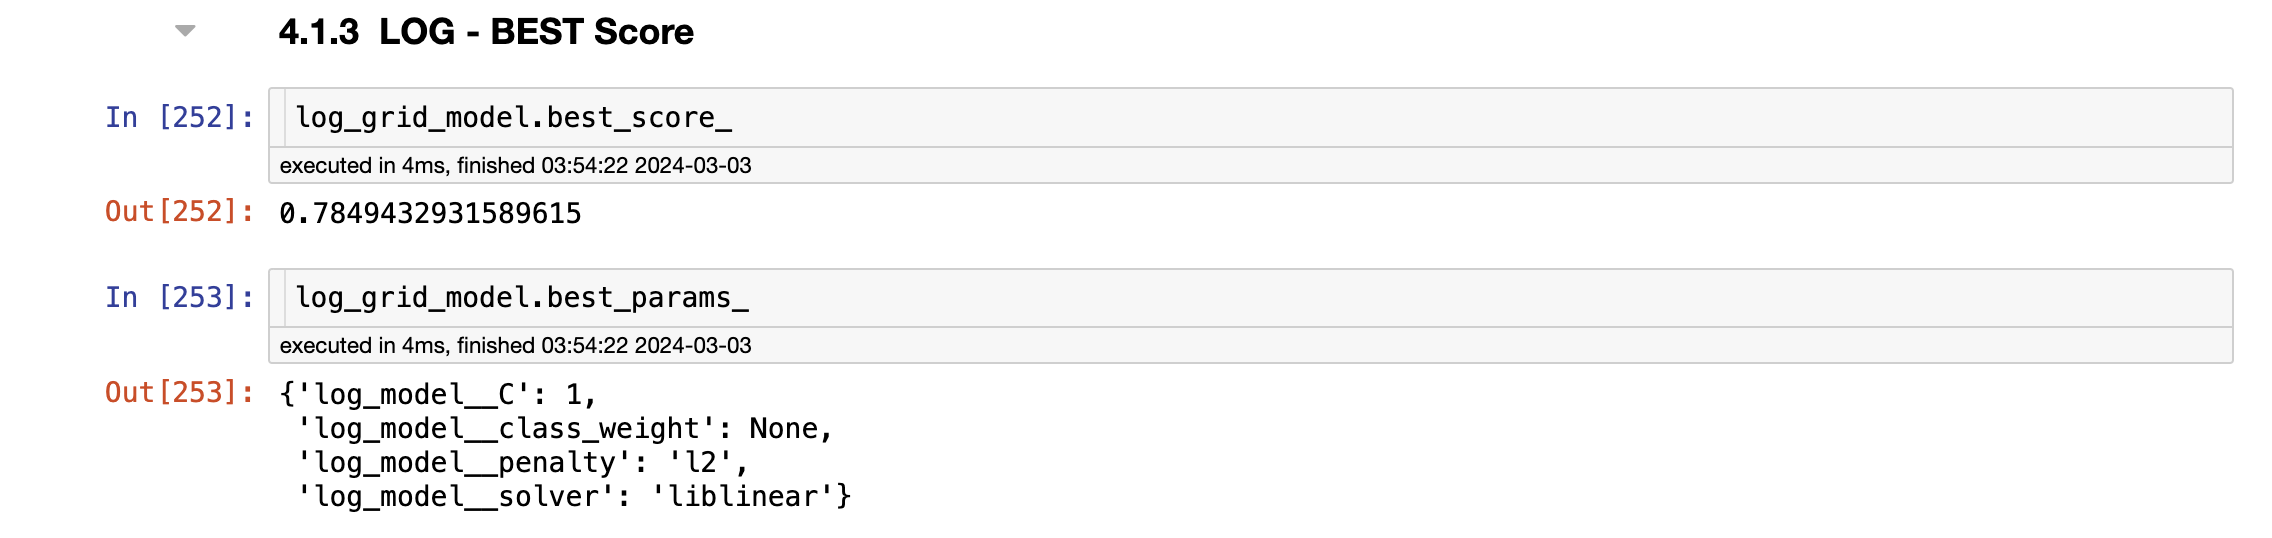

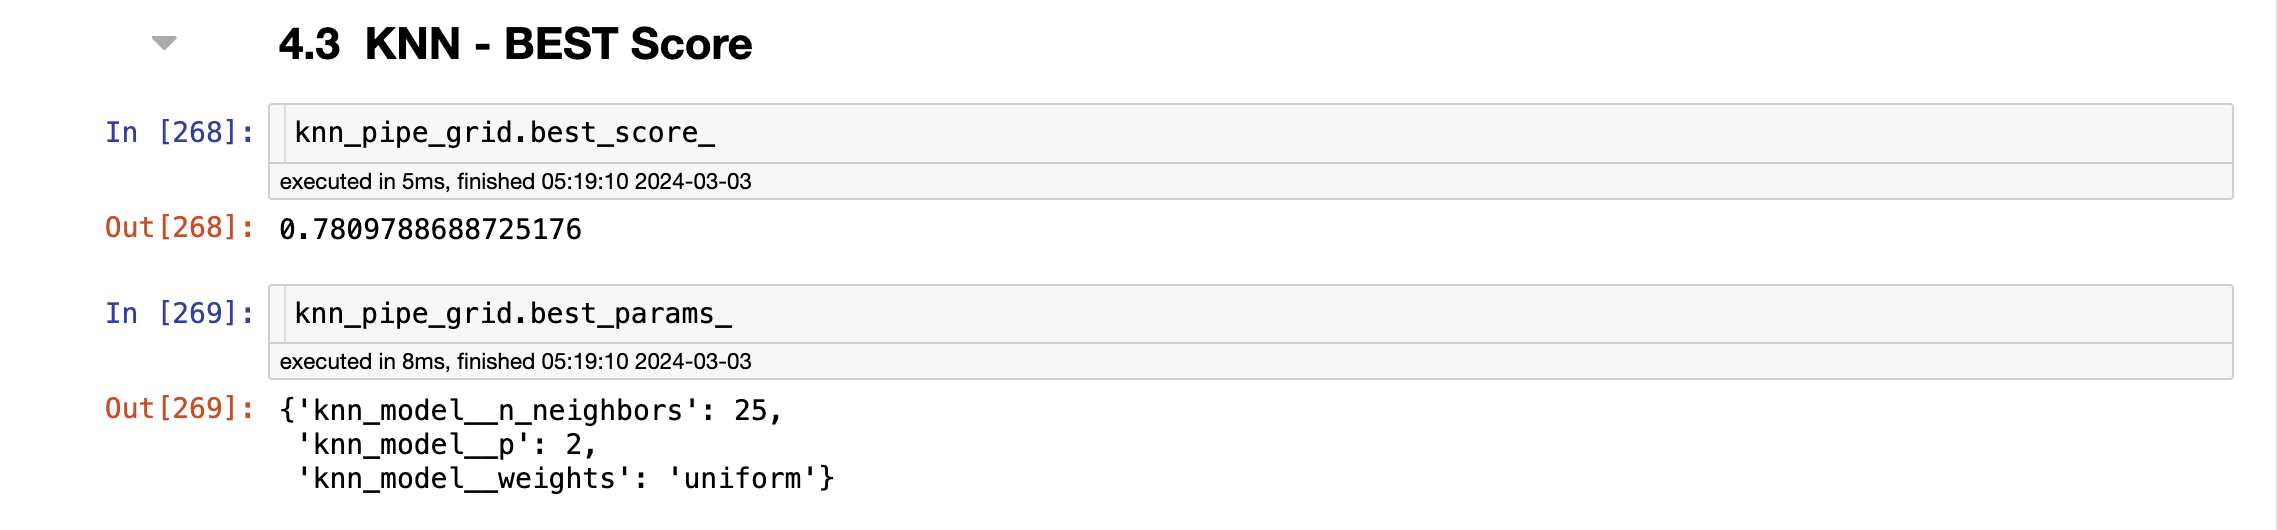

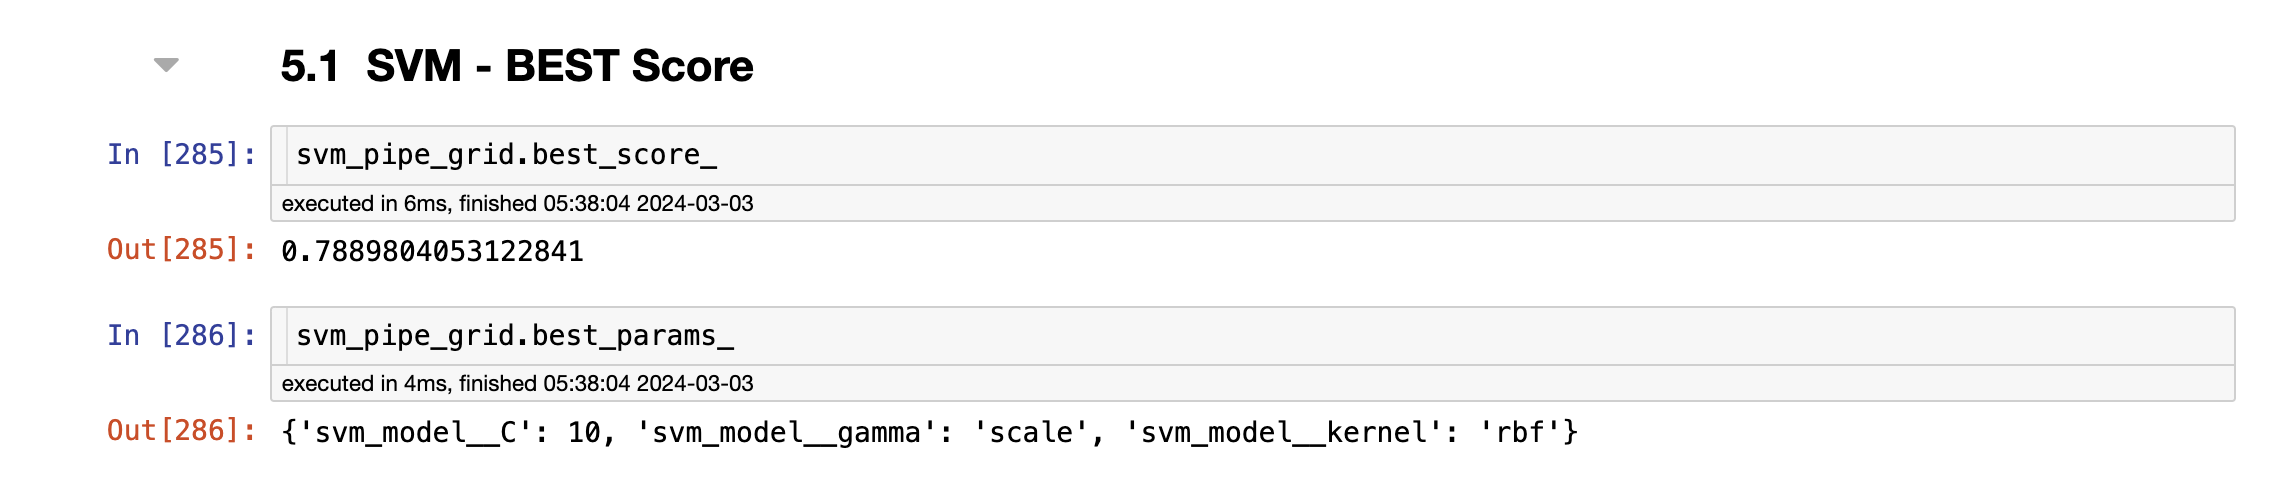

# Conclusion

Firstly, I would like to mention that due to the imbalance in our dataset, we evaluated model performances based on the Average Macro F1 score.

After a comprehensive analysis and cross-validation, we observed that SVM slightly outperformed Logistic Regression and KNN models in terms of the Average Macro F1 score. Therefore, it is expected that we select the SVM model, which achieved the highest score, as the final model.

However, it is important to also consider the computational efficiency of the selected model, especially if we anticipate a larger or more complex dataset in the future. Despite receiving slightly lower scores, Logistic Regression exhibits significantly lower time complexity. This suggests that it may offer a more scalable solution. Therefore, evaluating the balance between model performance and computational efficiency requires careful consideration of the specific requirements and expected growth potential of our application.

In conclusion, while SVM may currently offer the best predictive performance, the decision to prefer Logistic Regression should be based on a clear understanding of our system's current computational resources and potential scalability requirements. Making this decision requires a comprehensive understanding of the situation. Taking all this into account, we decided to use the Logistic Regression model.

# Final Model

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=["income"])
y = df['income']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("log_model", LogisticRegression(penalty='l2',
                                                                                C=1.0,
                                                                                solver='liblinear',
                                                                                max_iter=5000,
                                                                                n_jobs=-1,
                                                                                random_state=101))]

pipe_final = Pipeline(steps=operations)


In [ ]:
pipe_final.fit(X, y)

In [ ]:
X.head(5)

In [ ]:
sample =X.head(5)

In [ ]:
pipe_final.predict(sample)

In [ ]:
prediction = pipe_final.predict(sample)

In [ ]:
comparing = df.head()

In [ ]:
comparing["prediction"] = prediction

In [ ]:
comparing